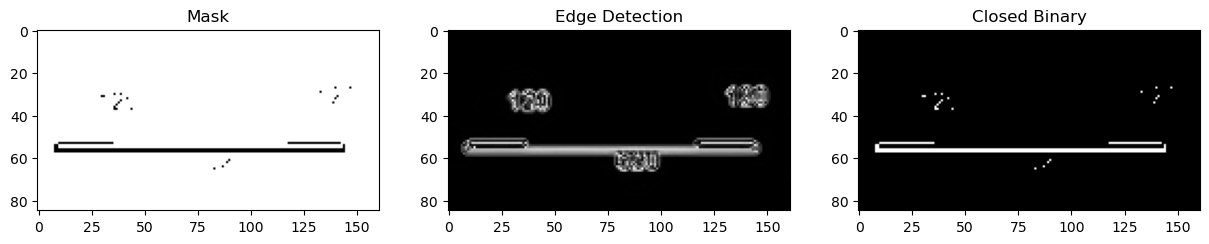

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input image
image_path = "st_bar_main.png"

# Load the image
img = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter to smooth the image while preserving edges
gray = cv2.bilateralFilter(gray, 10, 25, 5)

# Apply Laplacian edge detection
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

# Contour detection
contours, hierarchy = cv2.findContours(lap, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small objects by perimeter size
perimeter_threshold = 60  # Adjust this threshold as needed
filtered_contours = [cnt for cnt in contours if cv2.arcLength(cnt, True) > perimeter_threshold]

# Draw contours on a white background
white_background = np.ones_like(img) * 255
contour_image = cv2.drawContours(white_background, filtered_contours, -1, (0, 0, 0), 2)

# Apply binary thresholding
threshold_value = 36  # Adjust this threshold as needed
_, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Remove noise using morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Further refine the mask by closing operation
kernel = np.ones((1, 1), dtype=np.uint8)
closed_binary = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Invert the mask to create a mask for the numbers
mask = cv2.bitwise_not(thresh)

# Plotting the results
plt.figure(figsize=(15, 3))

# Plot the original mask
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

# Plot the edge detection result
plt.subplot(1, 3, 2)
plt.imshow(lap, cmap='gray')
plt.title('Edge Detection')

# Plot the binary image after closing
plt.subplot(1, 3, 3)
plt.imshow(closed_binary, cmap='gray')
plt.title('Closed Binary')

# Show the plots
plt.show()

# Clean up windows (useful for interactive environments)
cv2.destroyAllWindows()


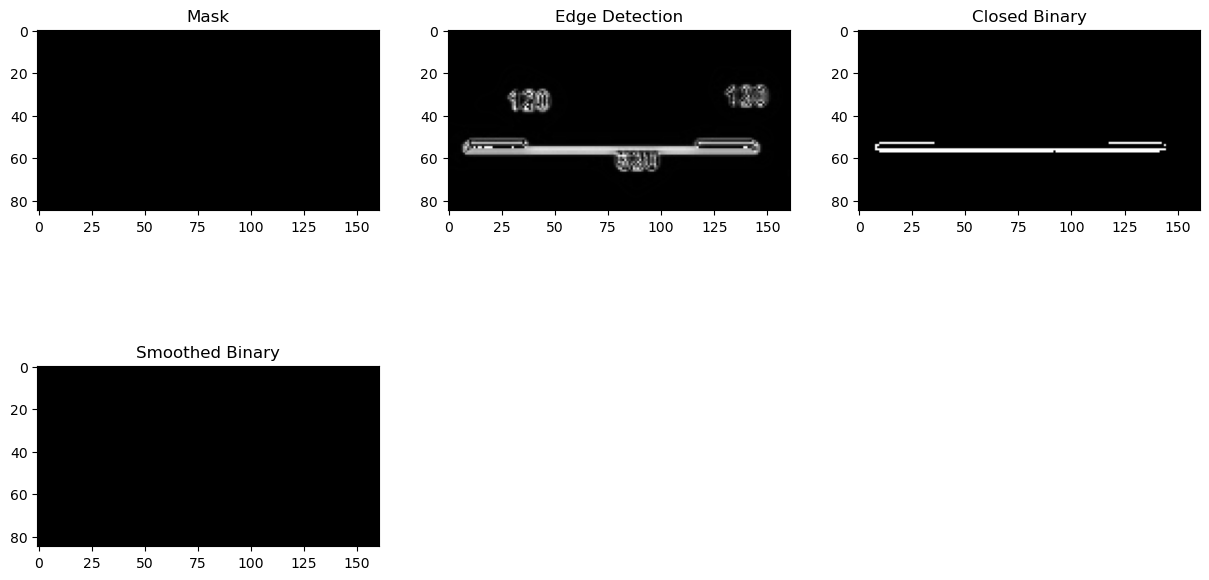

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input image
image_path = "st_bar_main.png"

# Load the image
img = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter to smooth the image while preserving edges
gray = cv2.bilateralFilter(gray, 30, 63, 3)

# Apply Laplacian edge detection
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

# Contour detection
contours, hierarchy = cv2.findContours(lap, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small objects by perimeter size
perimeter_threshold = 60  # Adjust this threshold as needed
filtered_contours = [cnt for cnt in contours if cv2.arcLength(cnt, True) > perimeter_threshold]

# Draw contours on a white background
white_background = np.ones_like(img) * 255
contour_image = cv2.drawContours(white_background, filtered_contours, -1, (0, 0, 0), 2)

# Apply binary thresholding
threshold_value = 36  # Adjust this threshold as needed
_, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Remove noise using morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Further refine the mask by closing operation
kernel = np.ones((1, 1), dtype=np.uint8)
closed_binary = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Apply erosion and dilation for corner smoothing
erosion_kernel = np.ones((3, 3), np.uint8)  # Erosion kernel
dilation_kernel = np.ones((3, 3), np.uint8)  # Dilation kernel

# Apply erosion followed by dilation
eroded = cv2.erode(closed_binary, erosion_kernel, iterations=1)
smoothed = cv2.dilate(eroded, dilation_kernel, iterations=1)

# Invert the mask to create a mask for the numbers
mask = cv2.bitwise_not(smoothed)

# Plotting the results
plt.figure(figsize=(15, 8))

# Plot the original mask
plt.subplot(2, 3, 1)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

# Plot the edge detection result
plt.subplot(2, 3, 2)
plt.imshow(lap, cmap='gray')
plt.title('Edge Detection')

# Plot the binary image after closing
plt.subplot(2, 3, 3)
plt.imshow(closed_binary, cmap='gray')
plt.title('Closed Binary')

# Plot the smoothed image
plt.subplot(2, 3, 4)
plt.imshow(smoothed, cmap='gray')
plt.title('Smoothed Binary')

# Show the plots
plt.show()

# Clean up windows (useful for interactive environments)
cv2.destroyAllWindows()


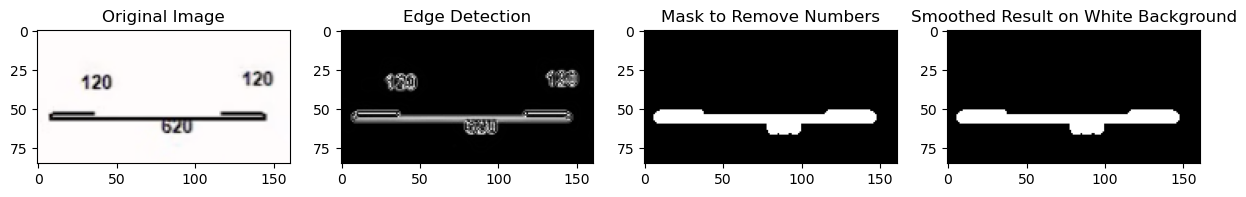

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "st_bar_main.png"
img = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter to smooth the image while preserving edges
gray = cv2.bilateralFilter(gray, 10, 23, 3)

# Apply dilation to enhance faint edges
dilation_kernel = np.ones((1, 1), np.uint8)
dilated_gray = cv2.dilate(gray, dilation_kernel, iterations=1)

# Apply Laplacian edge detection
lap = cv2.Laplacian(dilated_gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

# Threshold the edge image to get a binary image
_, binary = cv2.threshold(lap, 30, 255, cv2.THRESH_BINARY)

# Contour detection
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Remove small objects by area
area_threshold = 400  # Adjust this threshold as needed
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > area_threshold]

# Create a mask to remove small objects (numbers)
mask = np.ones_like(gray) * 255  # Start with a white mask
cv2.drawContours(mask, filtered_contours, -1, (0, 0, 0), thickness=cv2.FILLED)

# Invert the mask to remove numbers
mask_inv = cv2.bitwise_not(mask)

# Apply the mask to the original image to remove numbers
result = cv2.bitwise_and(img, img, mask=mask_inv)

# Convert the result to grayscale for further processing
result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Apply erosion and dilation for corner smoothing
erosion_kernel = np.ones((3, 3), np.uint8)  # Erosion kernel
dilation_kernel = np.ones((3, 3), np.uint8)  # Dilation kernel

# Apply erosion followed by dilation
eroded = cv2.erode(result_gray, erosion_kernel, iterations=1)
smoothed = cv2.dilate(eroded, dilation_kernel, iterations=1)

# Create a white background
white_background = np.ones_like(img) * 255

# Overlay the smoothed result on the white background
overlay = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

# Plotting the results
plt.figure(figsize=(15, 4))

# Plot the original image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Plot the edge detection result
plt.subplot(1, 4, 2)
plt.imshow(lap, cmap='gray')
plt.title('Edge Detection')

# Plot the mask used to remove numbers
plt.subplot(1, 4, 3)
plt.imshow(mask_inv, cmap='gray')
plt.title('Mask to Remove Numbers')

# Plot the final smoothed result on white background
plt.subplot(1, 4, 4)
plt.imshow(overlay)
plt.title('Smoothed Result on White Background')

# Show the plots
plt.show()

# Clean up windows (useful for interactive environments)
cv2.destroyAllWindows()


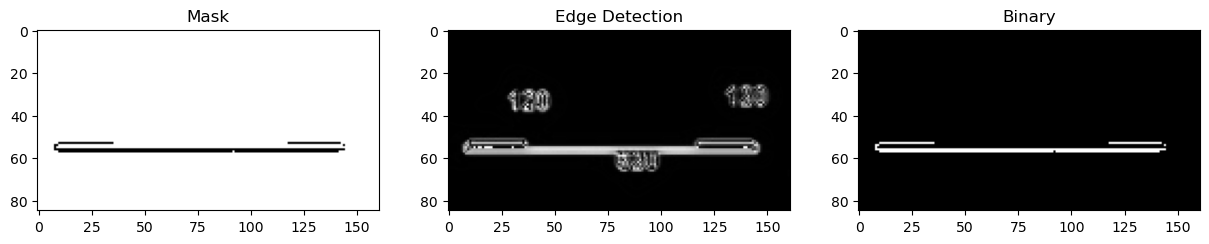

In [46]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

image_path = "st_bar_main.png"

# Load the image
img = cv2.imread(image_path)

# Grayscale Image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 30, 63, 3)
# 30,63,10

# Laplacian
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
           
# Contour Detection
contours, hierarchy = cv2.findContours(lap, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Remove small objects by calculating the perimeter
perimeter_threshold = 60  # Adjust this threshold as needed
filtered_contours = [cnt for cnt in contours if cv2.arcLength(cnt, True) > perimeter_threshold]

# Draw contours on a white background
white_background = np.ones_like(img) * 255
contour_image = cv2.drawContours(white_background, filtered_contours, -1, (0, 0, 0), 2)

# Threshold
threshold_value = 36 #45
_, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

kernel = np.ones((1, 1), dtype=np.uint8)
closed_binary = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=2)

# Invert the mask to create a mask for numbers
mask = cv2.bitwise_not(thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Plotting
plt.figure(figsize=(15, 3))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

# Plot the Adaptive Binary image
plt.subplot(1, 3, 2)
plt.imshow(lap, cmap='gray')
plt.title('Edge Detection')

# # Plot the image without numbers
plt.subplot(1, 3, 3)
plt.imshow(thresh, cmap='gray')
plt.title('Binary')

# Show the plots
plt.show()